<a href="https://colab.research.google.com/github/PaulNjinu254/Linear-Regression-Series/blob/main/Linear_Regression_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The loss at iteration 0 is 19899092276.67209
The loss at iteration 1 is 4467945054.7427225
The loss at iteration 2 is 2341547716.7218685
The loss at iteration 3 is 2035306782.2225142
The loss at iteration 4 is 1978493733.7680674
The loss at iteration 5 is 1956269266.096472
The loss at iteration 6 is 1939235351.732462
The loss at iteration 7 is 1923356675.2922013
The loss at iteration 8 is 1908067167.032802
The loss at iteration 9 is 1893275686.224675
The loss at iteration 10 is 1878956483.3600676
The loss at iteration 11 is 1865093175.038476
The loss at iteration 12 is 1851671068.1314847
The loss at iteration 13 is 1838676096.957389
The loss at iteration 14 is 1826094665.3112383
The loss at iteration 15 is 1813913612.650473
The loss at iteration 16 is 1802120197.6494722
The loss at iteration 17 is 1790702084.5057662
The loss at iteration 18 is 1779647329.9867897
The loss at iteration 19 is 1768944370.9305236
The loss at iteration 20 is 1758582012.1496093
The loss at iteration 21 is 174

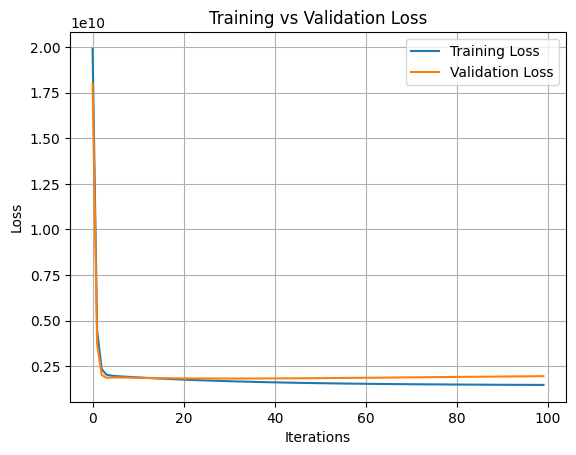

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']].values
y = dataset.loc[:, ['SalePrice']].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Scratch Linear Regression class
class ScratchLinearRegression():
    def __init__(self, num_iter=100, lr=0.01, no_bias=True, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
        self.theta = None
        self.loss = []
        self.val_loss = []

    def fit(self, X, y, X_val, y_val):
        if self.bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
            X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

        self.theta = np.zeros((X.shape[1], 1))

        for i in range(self.num_iter):
            pred = self._linear_hypothesis(X)
            pred_val = self._linear_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            val_loss = self._loss_func(pred_val, y_val)
            self.loss.append(loss)
            self.val_loss.append(val_loss)
            if self.verbose:
                print(f'The loss at iteration {i} is {loss}')

    def _linear_hypothesis(self, X):
        return X @ self.theta

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        pred = self._linear_hypothesis(X)
        gradient = (1/m) * (X.T @ (pred - y))
        self.theta -= self.lr * gradient

    def predict(self, X):
        if self.bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self._linear_hypothesis(X)

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def _loss_func(self, y_pred, y):
        return self.MSE(y_pred, y) / 2

# Create and train model
slr = ScratchLinearRegression(num_iter=100, lr=0.0000001, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

# Plot the training and validation loss
plt.plot(slr.loss, label='Training Loss')
plt.plot(slr.val_loss, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
